# Bitcoin Price Prediction Project with ARIMA, XGBoost and LSTM
## ARIMA

This notebook is part of Bitcoin Price Prediction Project with ARIMA model.
Complete project consists of three notebooks with sections as below.

1. Abstract
2. Data description   # (this notebook only)
3. Gathering data     # (this notebook only)
4. Data preprocessing
5. ARIMA Model        # (this notebook)
    - 5.1. ARIMA  =>  Introduction
    - 5.2. ARIMA Model  =>  function definition
    - 5.3. ARIMA Model  =>  Forecasting
        - complete data
        - data start from 2018-01-01
        - data start from 2021-01-01
    - 5.4. ARIMA Model  =>  summary
6. XGBoost            # (02_BTC_Price_Prediction - XGBoost.ipynb notebook)
    - 6.1. XGBRegressor  =>  Introduction
    - 6.2. XGBRegressor  =>  function definition
    - 6.3. XGBRegressor  =>  Forecasting
        - complete data
        - data start from 2018-01-01
        - data start from 2021-01-01
    - 6.4. XGBRegressor  =>  summary
7. LSTM Model         # (03_BTC_Price_Prediction - LSTM.ipynb notebook)
    - 7.1. LSTM  =>  Introduction
    - 7.2. LSTM  =>  function definition
    - 7.3. LSTM  =>  Forecasting
        - complete data
        - data start from 2018-01-01
        - data start from 2021-01-01
    - 7.4. LSTM  =>  summary
8. Project summary    # (03_BTC_Price_Prediction - LSTM.ipynb notebook)

## 1. Abstract

Bitcoin is a cryptocurrency, created in 2009. Bitcoin system is a set of decentralized nodes with the bitcoin code, that contains collection of transactions. A blockchain is a distributed database that is shared among the nodes of a computer network. As a database, a blockchain stores information in digital format. All the computers running the blockchain has the same list of blocks and transactions, and can see all these new blocks being filled with new bitcoin transactions.

The original purpose of Bitcoin (BTC in short) is to allow two people to exchange value directly (using peer-to-peer technology), without centralbanks or goverments, regardless where they are. What this means is that Bitcoin blockchain is decentralized -  there is no centralized controll on this network.

Responsibility for processing transactions on the blockchain is done by - so called - Miners. "Mining" is performed using sophisticated hardware that solves an extremely complex math problem. The first computer to find the solution to the problem receives the next block of bitcoins, and the process begins again. A newly mined block of bitcoins now can be used to store a value or be sold.

The amount of bitcoins is predetermined. Each and every Bitcoin had to be mined previously. For every four years, the amount of bitcoins that can be mined, decreeses by half. That is so called halving of Bitcoin. The next halving will be in 2024, and means that miners will receive half of current revard for processing transactions.

Decentralization, predetermined amount of the cryptocurrency and current dificulty of gaining new Bitcoins by miners, is the reason why Bitcoin is so popular. Some people even call it a "digital gold". Popularity of Bitcoin makes the bitcoin market very volatile, that is much higher compared to traditional currencies. Volatile marcet, may be an opportunity for speculation and other advantages of bitcoin, may lead to long term, store of value strategy.

Popularity of bitcoin has led invest founds to gain digitall assets in their wallets. This may disturb Bitcoin, four years halving cycles.

Predicting Bitcoin price based on historical data should be accounted for by the prism of marcet sentiment, current bitcoin phase and movement of large capital from invest founds and current big holders. In General - DO NOT USE THIS NOTEBOOK FOR INVESTING.

## 2. Data description

Historical data price has been taken from Coinpaprika API Python Client.
- Web Site - https://coinpaprika.com/waluta/btc-bitcoin/
- Github   - https://github.com/s0h3ck/coinpaprika-api-python-client

Coinpaprika is a popular data source for various cryptocurrencies, with Polish origins based in city of Poznań.
Free Coinpaprika API provides data in JSON, and has limitation for amount of data per request. For example maximum of 50 tweets or historical data for at most 365 days at one request.
Examples of use can be found in their Github site.

To gain the access, it is necessary to instal coinpaprica package:

In [1]:
# pip install coinpaprika

And import a data client from the installed pacage.

In [2]:
from coinpaprika import client as Coinpaprika

Some other, used in this notebook packages:

In [3]:
import pandas as pd
import numpy as np

from datetime import datetime, date

import matplotlib.pyplot as plt

from tqdm import tqdm

import warnings

In [4]:
# load the Coinpaprica client.
client = Coinpaprika.Client()

## 3. Gathering data

In [5]:
# Get historical OHLCV information for a specific coin (USD,BTC)
client.candles("btc-bitcoin", quotes="USD", start="2014-01-11T00:00:00Z")

[{'time_open': '2014-01-11T00:00:00Z',
  'time_close': '2014-01-11T23:59:59Z',
  'open': 867.32,
  'high': 921.48,
  'low': 861.72,
  'close': 913.95,
  'volume': 44754200,
  'market_cap': 11195636163}]

Limitation of historical data per request is 365 days. That is why it is necesarry to collect the data from Coinpaprica in parts, and gather those parts in one dataset.

In [6]:
# client.candles("btc-bitcoin", quotes="USD", start="2020-01-01T00:00:00Z", end="2020-12-31T00:00:00Z")

Above request will be missing of one day (2020-12-31) and will end in 365 day of the year (2020-12-30). This is the reason to split one year reguest of data, into two requests as below.

In [7]:
btc_array = []
days = 0

for year in range(2009, 2022+1, 1):
    
    year_str = str(year)
    
    first_half_start = year_str + "-01-01T00:00:00Z"
    first_half_end = year_str + "-06-30T00:00:00Z"
    second_half_start = year_str + "-07-01T00:00:00Z"
    second_half_end = year_str + "-12-31T00:00:00Z"
    
    first_half = client.candles("btc-bitcoin", quotes="USD", start=first_half_start, end=first_half_end)
    second_half = client.candles("btc-bitcoin", quotes="USD", start=second_half_start, end=second_half_end)
    
    btc_array = btc_array + first_half + second_half
    days_year = len(first_half + second_half)
    days = days + days_year
    print("Year:",year, "; Number of days in count:", days_year)

print("Days in total:", days)

Year: 2009 ; Number of days in count: 0
Year: 2010 ; Number of days in count: 168
Year: 2011 ; Number of days in count: 365
Year: 2012 ; Number of days in count: 366
Year: 2013 ; Number of days in count: 365
Year: 2014 ; Number of days in count: 365
Year: 2015 ; Number of days in count: 365
Year: 2016 ; Number of days in count: 366
Year: 2017 ; Number of days in count: 365
Year: 2018 ; Number of days in count: 365
Year: 2019 ; Number of days in count: 365
Year: 2020 ; Number of days in count: 366
Year: 2021 ; Number of days in count: 365
Year: 2022 ; Number of days in count: 90
Days in total: 4276


As it is shown above, Coinpaprika has no historical data from 2009 year and incomplite data from year 2010.

In [8]:
# check the length of gathered data.
len(btc_array)

4276

In [9]:
# check the last request.
btc_array[-1]

{'time_open': '2022-03-31T00:00:00Z',
 'time_close': '2022-03-31T08:12:00Z',
 'open': 47042.79259279733,
 'high': 47465.57104461329,
 'low': 46986.88459986246,
 'close': 47189.94094167055,
 'volume': 29505554408,
 'market_cap': 896552816241}

In [10]:
# convert gathered data to Pandas Data Frame.
btc_df_gathered = pd.DataFrame(btc_array)

In [11]:
# display df head with 100 rows.
btc_df_gathered.head(100)

,time_open,time_close,open,high,low,close,market_cap,volume
0,2010-07-17T00:00:00Z,2010-07-17T23:59:59Z,0.04951,0.04951,0.04951,0.04951,NaN,NaN
1,2010-07-18T00:00:00Z,2010-07-18T23:59:59Z,0.04951,0.04951,0.04951,0.04951,NaN,NaN
2,2010-07-19T00:00:00Z,2010-07-19T23:59:59Z,0.08584,0.08584,0.08584,0.08584,NaN,NaN
3,2010-07-20T00:00:00Z,2010-07-20T23:59:59Z,0.08080,0.08080,0.08080,0.08080,NaN,NaN
4,2010-07-21T00:00:00Z,2010-07-21T23:59:59Z,0.07474,0.07474,0.07474,0.07474,NaN,NaN
...,...,...,...,...,...,...,...,...
95,2010-10-20T00:00:00Z,2010-10-20T23:59:59Z,0.09700,0.09700,0.09700,0.09700,NaN,NaN
96,2010-10-21T00:00:00Z,2010-10-21T23:59:59Z,0.09900,0.09900,0.09900,0.09900,NaN,NaN
97,2010-10-22T00:00:00Z,2010-10-22T23:59:59Z,0.10700,0.10700,0.10700,0.10700,NaN,NaN
98,2010-10-23T00:00:00Z,2010-10-23T23:59:59Z,0.10250,0.10250,0.10250,0.10250,NaN,NaN


In [12]:
# display tail of the df.
btc_df_gathered.tail()

,time_open,time_close,open,high,low,close,market_cap,volume
4271,2022-03-27T00:00:00Z,2022-03-27T23:59:59Z,44511.979374,46790.411154,44467.684436,46790.411154,8.888166e+11,2.751942e+10
4272,2022-03-28T00:00:00Z,2022-03-28T23:59:59Z,46800.224721,48105.499901,46680.786196,47099.086062,8.947266e+11,3.973186e+10
4273,2022-03-29T00:00:00Z,2022-03-29T23:59:59Z,47132.356921,47955.265321,47034.550626,47445.585827,9.013543e+11,3.359395e+10
4274,2022-03-30T00:00:00Z,2022-03-30T23:59:59Z,47429.150715,47722.720548,46772.767644,47085.525456,8.945538e+11,3.154035e+10
4275,2022-03-31T00:00:00Z,2022-03-31T08:12:00Z,47042.792593,47465.571045,46986.884600,47189.940942,8.965528e+11,2.950555e+10


In [13]:
# save gathered data in to .csv file as a backup. Just in case...
btc_df_gathered.to_csv("BTC_Preprocess_Backup.csv", sep = ",", index = False)

In [14]:
# restore data backup

# btc_df_gathered = pd.read_csv("BTC_Preprocess_Backup.csv", sep = ",", skipinitialspace=True)
# btc_df_gathered.head()

## 4. Data preprocessing

In [15]:
# copy data to new df
btc_df_1 = btc_df_gathered

In [16]:
# check datatypes
btc_df_1.dtypes

time_open      object
time_close     object
open          float64
high          float64
low           float64
close         float64
market_cap    float64
volume        float64
dtype: object

In [17]:
# change df index to date
btc_df_1.index = pd.to_datetime(btc_df_1["time_close"]).dt.date

# drop "time_open", "time_close" columns
btc_df_1.drop(["time_open", "time_close"], axis=1, inplace=True)
btc_df_1.head()

,open,high,low,close,market_cap,volume
time_close,,,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951,NaN,NaN
2010-07-18,0.04951,0.04951,0.04951,0.04951,NaN,NaN
2010-07-19,0.08584,0.08584,0.08584,0.08584,NaN,NaN
2010-07-20,0.08080,0.08080,0.08080,0.08080,NaN,NaN
2010-07-21,0.07474,0.07474,0.07474,0.07474,NaN,NaN


In [18]:
# show df shape
btc_df_1.shape

(4276, 6)

In [19]:
btc_df_1.describe()

,open,high,low,close,market_cap,volume
count,4276.000000,4276.000000,4276.000000,4276.000000,3.260000e+03,3.017000e+03
mean,7620.722003,7818.648308,7411.105750,7632.136514,1.835636e+11,1.205864e+10
std,14287.143745,14651.680612,13896.018691,14300.996427,2.947438e+11,1.710047e+10
min,0.049510,0.049510,0.049510,0.049510,7.784112e+08,2.857830e+06
25%,111.217500,114.591000,107.450000,111.500000,6.510601e+09,5.567090e+07
50%,638.137000,656.522000,627.096000,638.393000,6.466303e+10,3.682395e+09
75%,8191.225324,8321.616465,7952.276240,8196.622730,1.752686e+11,1.885380e+10
max,67589.872823,68692.137037,66457.970074,67589.768671,1.275266e+12,1.363702e+11


## 5. ARIMA Model

## 5.1. ARIMA  =>  Introduction

This notebook was created to predict the Bitcoin price (in USD) using the ARIMA model.
The model has been programmed in a function to perform a forecast with different data ranges. 
To evaluate optimal order (p, d, q), an auto_ARIMA was used and then received order has been passed to ARIMA model.

The mean square error (RMSE) was used to evaluate the performance of the model - it should be as low as possible.

Training data is the first 80% of the dataset and the rest is in the test datasets.

At the end of the notebook, a summary of the task is presented along with a graph of the RMSE results of the model.

For the Autoregressive Integrated Moving Average (ARIMA) model, data should be stationary.
ARIMA Model is popular for predicting time series data.
- AR stands for autoregressive (p)
- I stand for Integrated (d), 
- MA stands for moving average (q)

Auto ARIMA - automatically discover the optimal order (p, d, q) for an ARIMA model.

For price prediction it will be used columns "close" and "time_close" as idex.

In [20]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error

### 5.2. ARIMA Model  =>  function definition

In [21]:
def arima_variants(df_variants: list, train_size: float):
    
    """
    This function includes ARIMA modeling for Bitcoin price prediction with walk-forward validation
    and auto_ARIMA to find the optimal order (p, d, q).
    The function is prepared for prediction, based on a sets of data - eg. different ranges of historical data.
    """
    
    variant = 0  # data variant number
    rmse = []    # ARIMA rmse
    
    # general loop fo data viaraints (data range)
    for df in tqdm(df_variants):
        
        # ---------------------------------------------------------------
        # increment for data variant number
        variant = variant + 1
        print(f"\nData variant no:", variant, "\n")
        # ---------------------------------------------------------------
        
        # ---------------------------------------------------------------
        print("ADF (Augmented Dickey-Fuller) test is used to check if series is stationary or not.")
        # test for staionarity
        adf_test = adfuller(df)
        
        # translation for the adf_test output
        output = pd.Series(adf_test[0:4],index=["adf test", "p-value", "used lags", "used observations"])
        
        # unpack the last output object (dict)
        print("adf_test output:")
        for key, val in adf_test[4].items():
            output[f"critical value {key}"] =  val
        print(output)
        # ---------------------------------------------------------------
        
        # ---------------------------------------------------------------
        # Checking for trend and seasonality of the data
        print("\nChecking for trend and seasonality of the data.\n")
        result = seasonal_decompose(df, model="multiplicative", period = 66)
        fig = plt.figure()
        fig = result.plot()
        fig.set_size_inches(13, 10)
        # ---------------------------------------------------------------
        
        # ---------------------------------------------------------------
        print("Values magnitude and the growing trend might be reduced by using logatythm on the data. \nNext, rolling average is calculated from data from the past year and a mean consumption value at each point of the data.")
        # if not stationary then reduce trend
        
        df_log = np.log(df + 1)  # get the data + 1 natural logarythm
        
        roll_mean = df_log.rolling(12).mean()
        roll_std = df_log.rolling(12).std()
        
        plt.figure(figsize=(10,5), dpi=100)
        plt.title("Moving Average")
        plt.plot(roll_mean, "blue", label = "Mean")
        plt.plot(roll_std, "red", label = "Std")
        plt.legend(loc="best", fontsize=7)
        plt.show()
        # ---------------------------------------------------------------
        
        # ---------------------------------------------------------------
        # train, test, split the data
        # train = train_size * data
        # test  = (1 - train_size) * data
        size = int(len(df_log) * train_size)
        train_data, test_data = df_log[:size], df_log[size:]
        # ---------------------------------------------------------------

        # ---------------------------------------------------------------
        # plot general data -  train, test, split ==> ln(data + 1)
        plt.figure(figsize=(10,5), dpi=100)
        plt.xlabel("Years")
        plt.ylabel("US Dollars")
        plt.plot(train_data, "green", label="Train data")
        plt.plot(test_data, "blue", label="Test data")
        plt.title("BTC closing price - train, test, split ==> ln(data + 1)")
        plt.legend(loc="best", fontsize=9)
        plt.show()
        # ---------------------------------------------------------------
        
        # ---------------------------------------------------------------
        # performing auto ARIMA model for getting optimal (p, d, q)
        auto_ARIMA_model = auto_arima(train_data, start_p=0, start_q=0, 
                                      test="adf",       # use adftest to find optimal "d"
                                      max_p=5, max_q=5, # maximum p and q
                                      m=1,              # frequency of series
                                      d=None,           # let model determine "d"
                                      seasonal=False,   # No Seasonality
                                      start_P=0, 
                                      D=0, 
                                      trace=True,
                                      error_action="ignore",  
                                      suppress_warnings=True, 
                                      stepwise=True)
            
            
        # get order from auto_arima
        order_auto_arima = auto_ARIMA_model.get_params().get("order")
        p, d, q = order_auto_arima
        print("\nauto_ARIMA order:", "\np =", p, "\nd =", d, "\nq =", q, "\n")
        
        # print summary of auto_arima
        print(auto_ARIMA_model.summary())
        auto_ARIMA_model.plot_diagnostics(figsize=(10,10))
        plt.show()
        
        print("Top left:     The residual errors fluctuate around a zero mean.")
        print("Top Right:    Plot suggests a normal distribution with a zero mean.")
        print("Bottom left:  Red line should be perfectly aligned with all of the dots.")
        print("Bottom Right: Residual errors are not autocorrelated. Correlogram, also known as the ACF plot.")
        # ---------------------------------------------------------------
        
        # ---------------------------------------------------------------
        print("\nARIMA model_fit.forecast() with auto_ARIMA order:")
        # define variables for second loop
        history = [x for x in train_data]
        predictions = []
        num_of_observations = len(test_data)
        
        # start of second loop - model_fit.forecast()
        warnings.filterwarnings("ignore")
        for t in range(num_of_observations):
            
            # ARIMA model fit, forecast ==> walk-forward
            model = ARIMA(history, order=(p, d, q))
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            true_test_val = test_data[t]
            history.append(true_test_val)
            
        # end of second loop - model_fit.forecast()
        # ---------------------------------------------------------------
        
        # ---------------------------------------------------------------
        # convert  predictions to pandas series
        fore_series = pd.Series((predictions[x][0] for x in range(len(predictions))), index=test_data.index)
        
        # convert back data from logarythm
        train_data = np.exp(train_data) - 1
        test_data = np.exp(test_data) - 1
        fore_series = np.exp(fore_series) - 1
        # ---------------------------------------------------------------
        
        # ---------------------------------------------------------------
        # plot results with train data
        plt.figure(figsize=(10,5), dpi=100)
        plt.plot(train_data, "green", label="Train data")
        plt.plot(test_data, "blue", label="Actual Price/ Test data")
        plt.plot(fore_series, "orange", label="Predicted Price")
        
        plt.title("BTC Price Prediction - with forecast")
        plt.xlabel("Time")
        plt.ylabel("BTC Price")
        plt.legend(loc="best", fontsize=8)
        plt.show()
        
        # plot results predictions and test data - zoom-in results
        plt.figure(figsize=(10,5), dpi=100)
        plt.plot(test_data, "blue", label="Actual Price/ Test data")
        plt.plot(fore_series, "orange", label="Predicted Price")
        
        plt.title("BTC Price Prediction - with forecast - zoom-in results")
        plt.xlabel("Time")
        plt.ylabel("BTC Price")
        plt.legend(loc="best", fontsize=8)
        plt.show()
        # ---------------------------------------------------------------
        
        # ---------------------------------------------------------------
        # print performance
        rmse_1 = mean_squared_error(test_data, fore_series, squared=False)
        print(model.__class__.__name__, "variant", variant,":", "RMSE = %.3f" % rmse_1, "\n")
        rmse.append(float(format(rmse_1, ".3f")))
        # ---------------------------------------------------------------
        
    # end of general loop for data viaraints (data range)
        
    return rmse

### 5.3. ARIMA Model  =>  Forecasting

In [22]:
# copy full dataset
df_var_1 = btc_df_1["close"]

# copy data starting from 2018-01-01
df_var_2 = btc_df_1["close"].iloc[2725:]

# copy data starting from 2021-01-01
df_var_3 = btc_df_1["close"].iloc[3821:]

data_variants = [
    df_var_1, 
    df_var_2, 
    df_var_3
]

  0%|          | 0/3 [00:00<?, ?it/s]


Data variant no: 1 

ADF (Augmented Dickey-Fuller) test is used to check if series is stationary or not.
adf_test output:
adf test                -0.656729
p-value                  0.857642
used lags               31.000000
used observations     4244.000000
critical value 1%       -3.431892
critical value 5%       -2.862221
critical value 10%      -2.567133
dtype: float64

Checking for trend and seasonality of the data.

Values magnitude and the growing trend might be reduced by using logatythm on the data. 
Next, rolling average is calculated from data from the past year and a mean consumption value at each point of the data.


<Figure size 432x288 with 0 Axes>

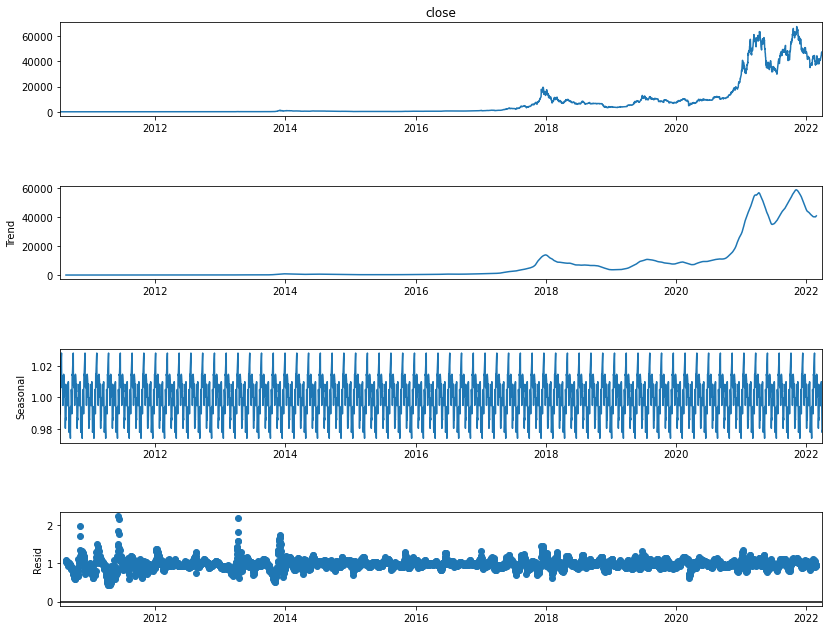

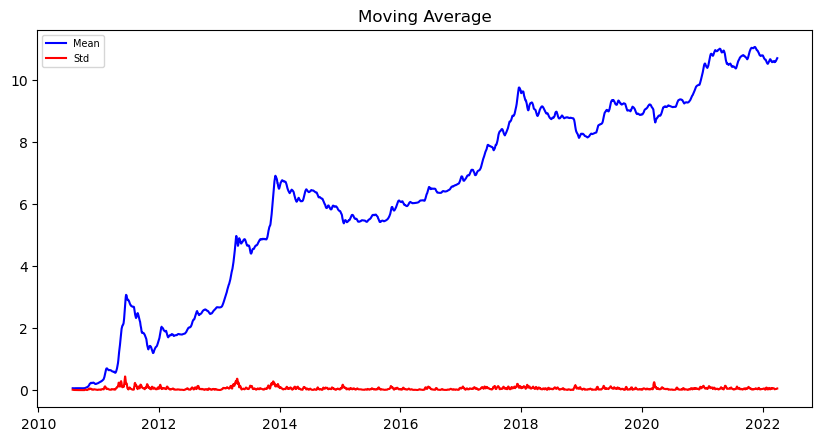

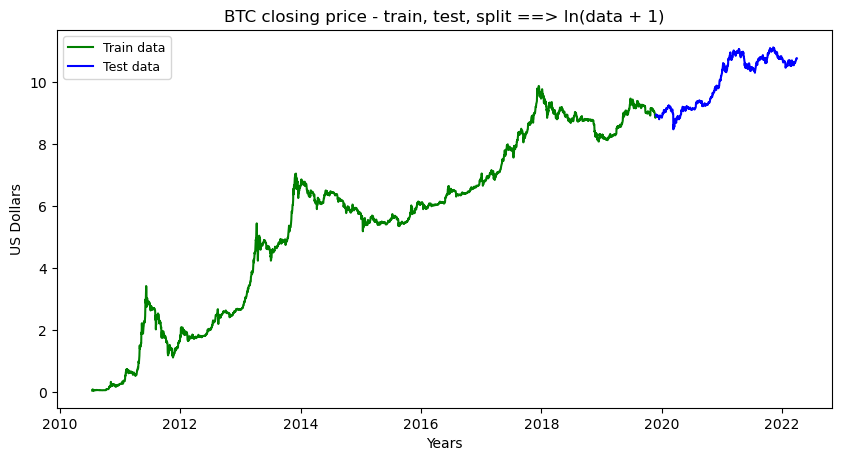

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11156.875, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11161.568, Time=0.88 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11161.969, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11148.695, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11163.135, Time=1.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-11158.688, Time=2.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11160.522, Time=1.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-11162.711, Time=0.95 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-11162.323, Time=0.39 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11159.821, Time=3.87 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-11156.263, Time=0.92 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 14.190 seconds

auto_ARIMA order: 
p = 1 
d = 1 
q = 1 

                               SARIMAX Results                                
Dep. Varia

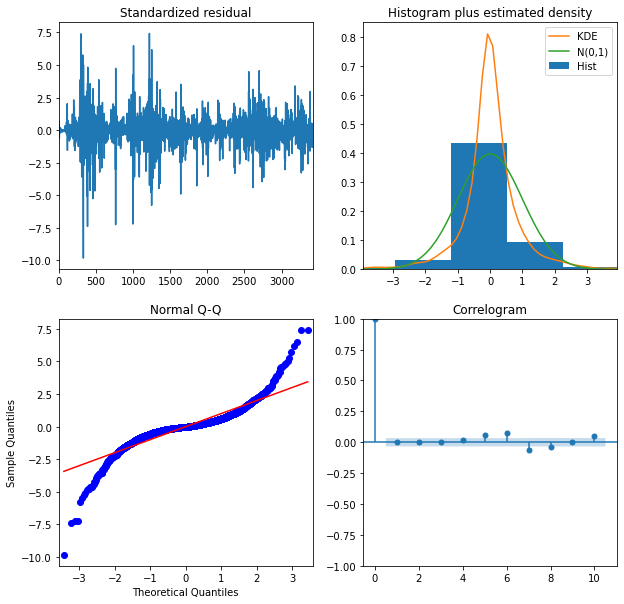

Top left:     The residual errors fluctuate around a zero mean.
Top Right:    Plot suggests a normal distribution with a zero mean.
Bottom left:  Red line should be perfectly aligned with all of the dots.
Bottom Right: Residual errors are not autocorrelated. Correlogram, also known as the ACF plot.

ARIMA model_fit.forecast() with auto_ARIMA order:


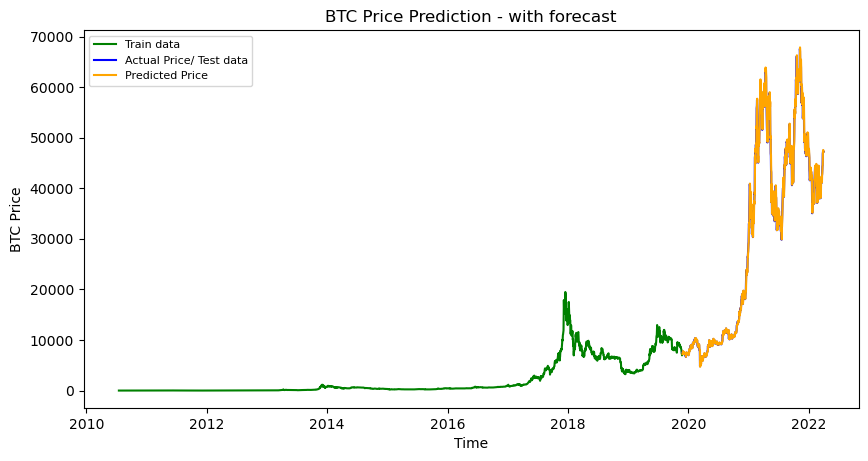

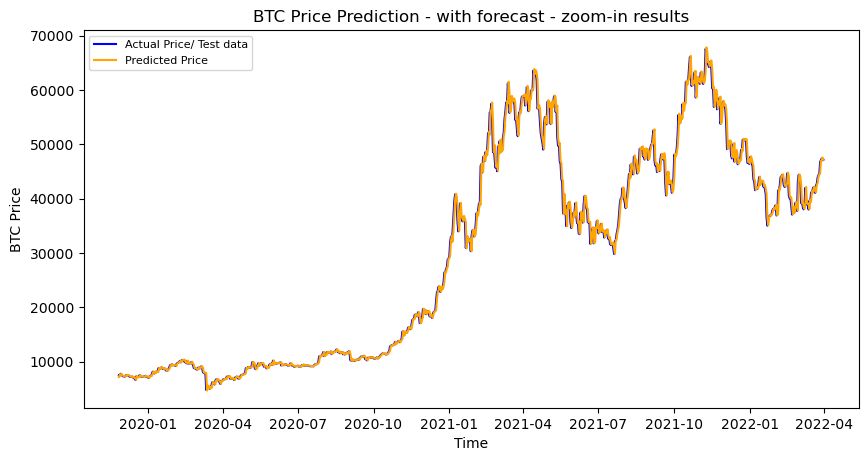

 33%|███▎      | 1/3 [10:26<20:53, 626.63s/it]

ARIMA variant 1 : RMSE = 1355.389 


Data variant no: 2 

ADF (Augmented Dickey-Fuller) test is used to check if series is stationary or not.
adf_test output:
adf test                -0.732751
p-value                  0.838083
used lags               24.000000
used observations     1526.000000
critical value 1%       -3.434642
critical value 5%       -2.863436
critical value 10%      -2.567779
dtype: float64

Checking for trend and seasonality of the data.

Values magnitude and the growing trend might be reduced by using logatythm on the data. 
Next, rolling average is calculated from data from the past year and a mean consumption value at each point of the data.


<Figure size 432x288 with 0 Axes>

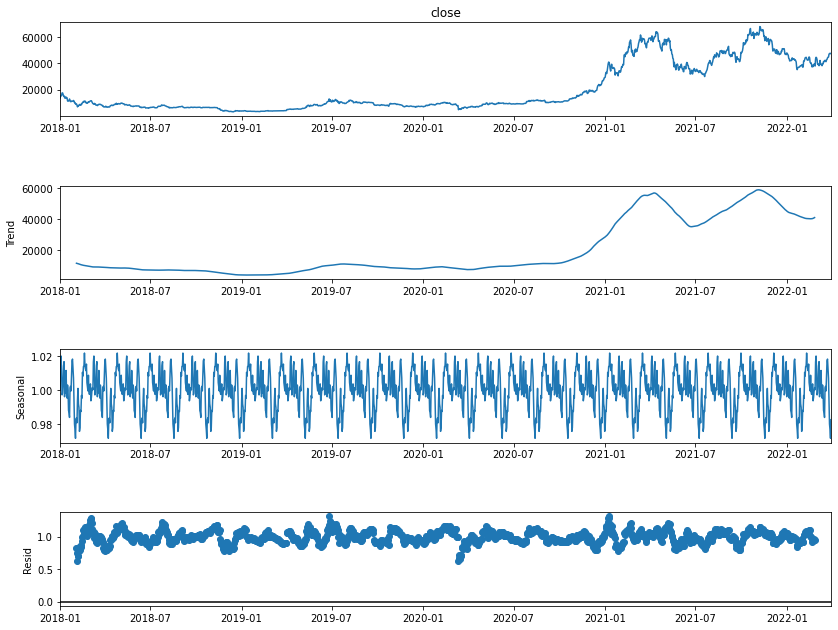

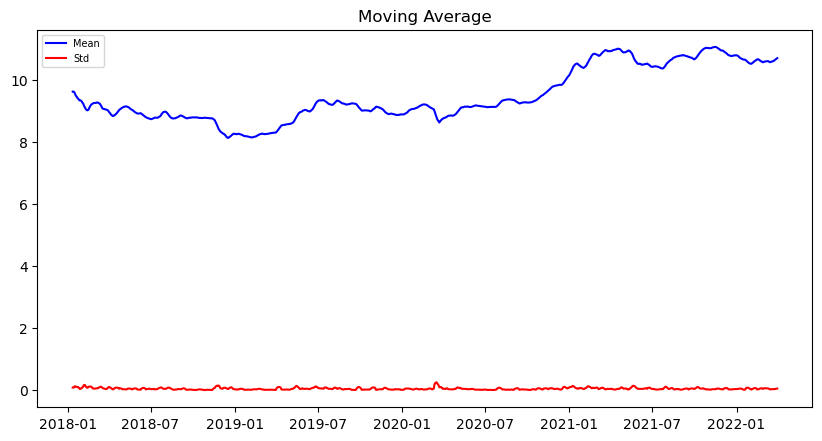

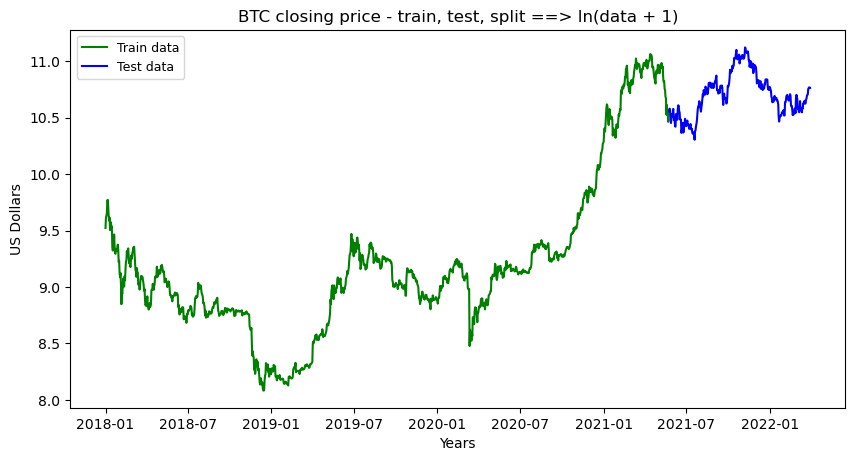

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4371.789, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4377.843, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4376.846, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4373.277, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4381.324, Time=0.36 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-4379.610, Time=0.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4380.020, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4381.738, Time=0.97 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4379.197, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4381.138, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4379.784, Time=2.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-4383.191, Time=0.56 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-4378.265, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-4379.257, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0

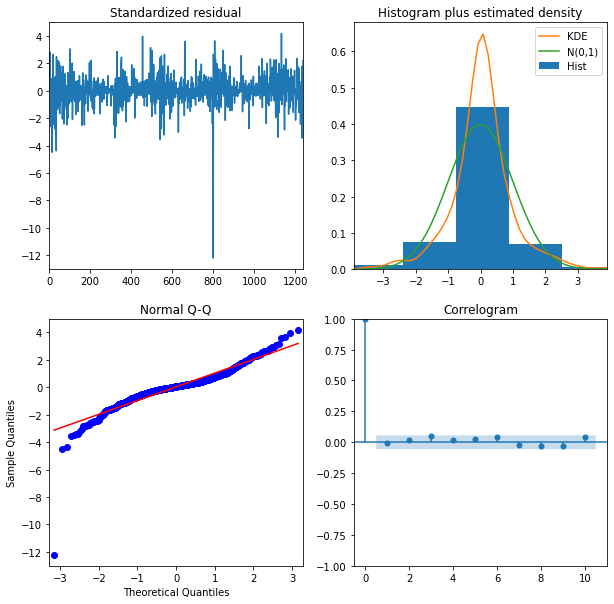

Top left:     The residual errors fluctuate around a zero mean.
Top Right:    Plot suggests a normal distribution with a zero mean.
Bottom left:  Red line should be perfectly aligned with all of the dots.
Bottom Right: Residual errors are not autocorrelated. Correlogram, also known as the ACF plot.

ARIMA model_fit.forecast() with auto_ARIMA order:


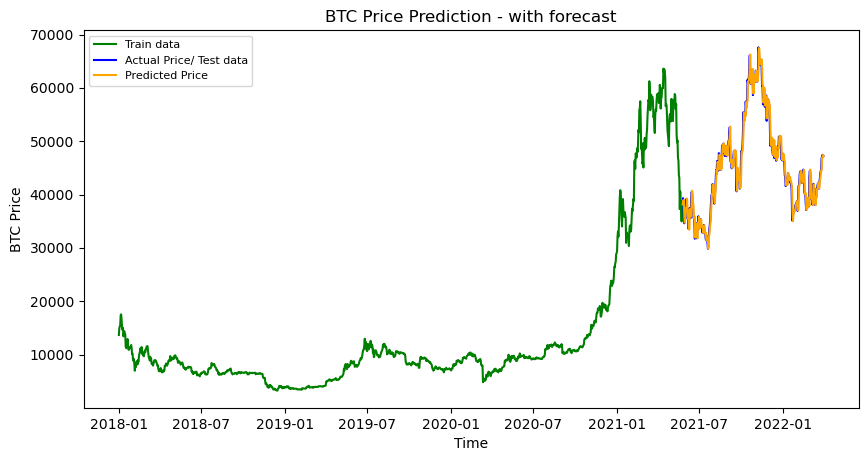

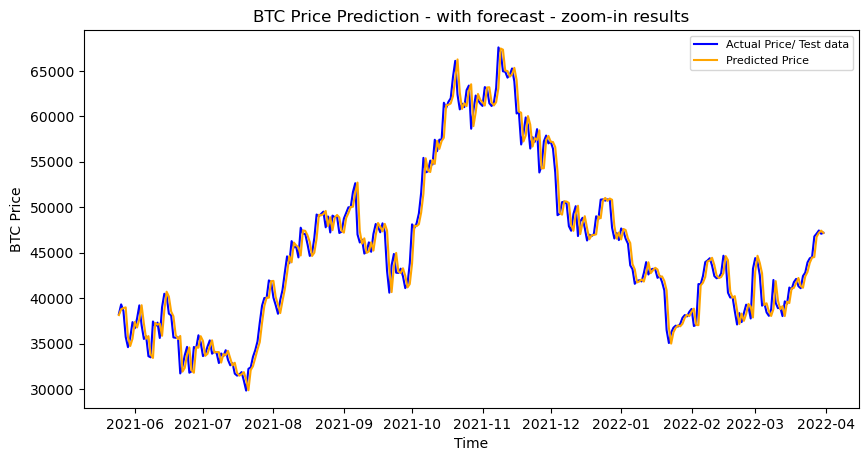

 67%|██████▋   | 2/3 [15:29<07:15, 435.99s/it]

ARIMA variant 2 : RMSE = 1623.172 


Data variant no: 3 

ADF (Augmented Dickey-Fuller) test is used to check if series is stationary or not.
adf_test output:
adf test               -2.506828
p-value                 0.113822
used lags               0.000000
used observations     454.000000
critical value 1%      -3.444836
critical value 5%      -2.867927
critical value 10%     -2.570172
dtype: float64

Checking for trend and seasonality of the data.

Values magnitude and the growing trend might be reduced by using logatythm on the data. 
Next, rolling average is calculated from data from the past year and a mean consumption value at each point of the data.


<Figure size 432x288 with 0 Axes>

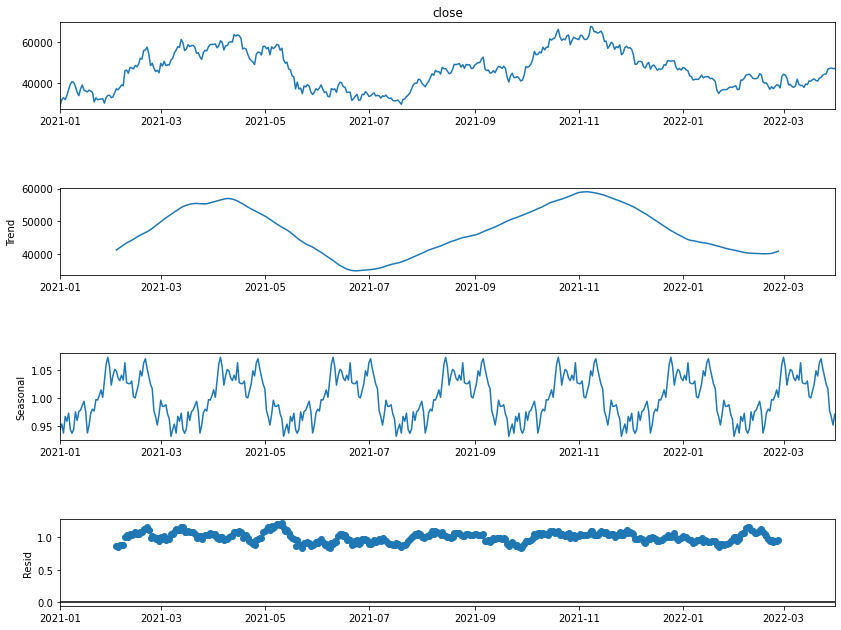

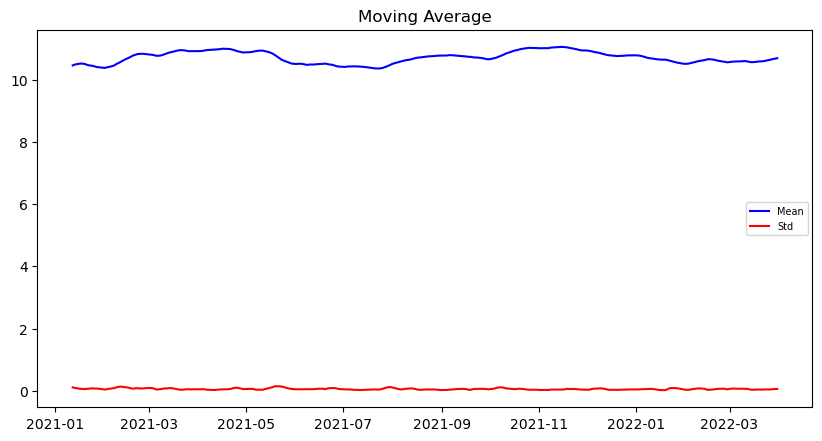

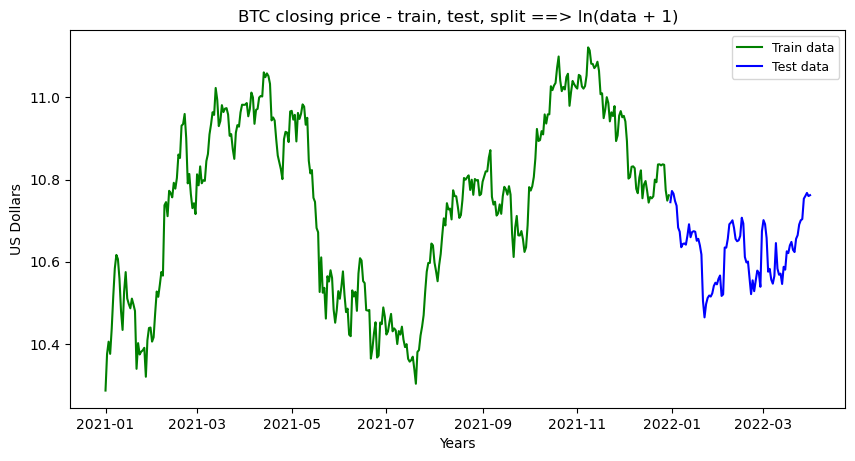

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1272.006, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1270.681, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1270.694, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1273.649, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1268.710, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.422 seconds

auto_ARIMA order: 
p = 0 
d = 1 
q = 0 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  364
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 637.825
Date:                Thu, 31 Mar 2022   AIC                          -1273.649
Time:                        10:28:29   BIC                          -1269.755
Sample:                             0   HQIC                         -1272.101
                             

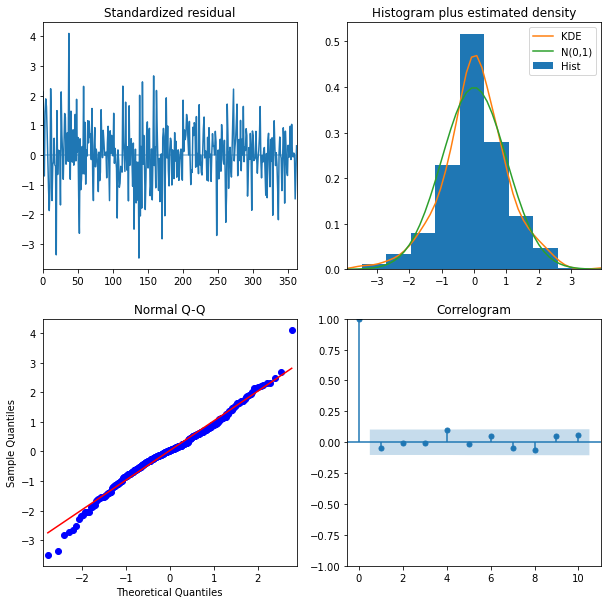

Top left:     The residual errors fluctuate around a zero mean.
Top Right:    Plot suggests a normal distribution with a zero mean.
Bottom left:  Red line should be perfectly aligned with all of the dots.
Bottom Right: Residual errors are not autocorrelated. Correlogram, also known as the ACF plot.

ARIMA model_fit.forecast() with auto_ARIMA order:


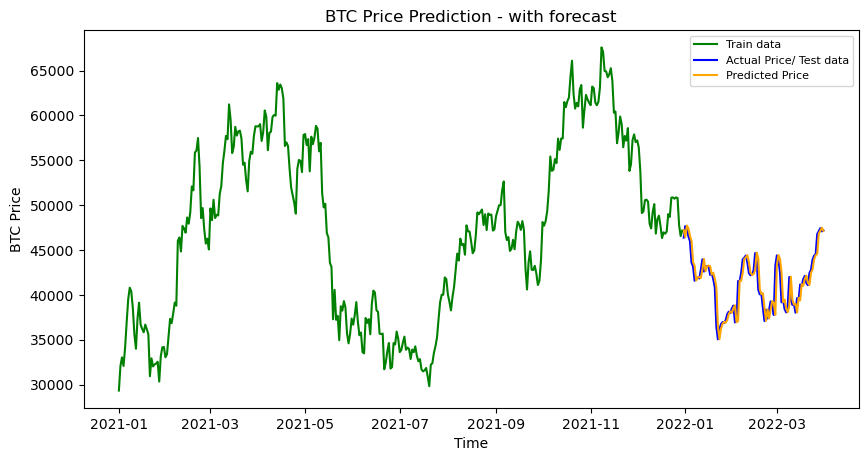

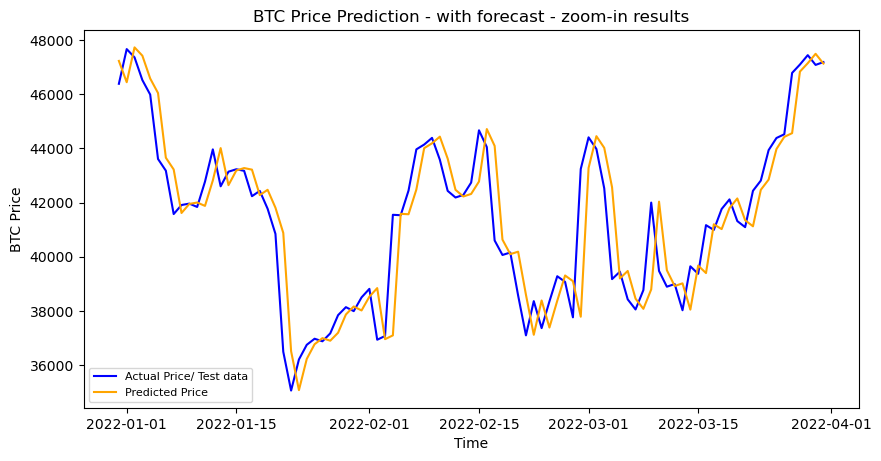

100%|██████████| 3/3 [15:33<00:00, 311.17s/it]

ARIMA variant 3 : RMSE = 1407.860 

Wall time: 15min 33s


In [23]:
%%time

# Forecasting
arima_variant_rmse = arima_variants(df_variants=data_variants, train_size=0.8)

### 5.4. ARIMA Model  =>  summary

Prediction of Bitcoin Price based on historical data was performed with ARIMA model in addition to auto_arima for getting optimal (p, d, q).

- In first try, complete dataset was used to tran the model.

- In second try, dataset was sliced, started from 2018-01-01.

- In third try, dataset was sliced, started from 2021-01-01.

For trend reduction, the natural logarythm of the data was used. Because of negative values of logarythm, 1 has been added to every value of the data set and then, natural logarythm.

In coparison of model performence of different data ranges, the best performence was for the complete data, then to past year + and at the end, to period of time around four years.

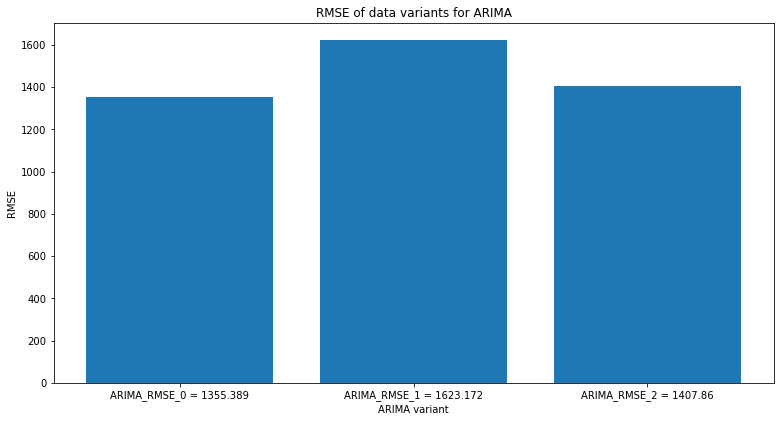

In [24]:
# plot for the RMSE's of data variants for ARIMA

ARIMA_variant = [("ARIMA_RMSE_" + str(x)) for x in range(len(arima_variant_rmse))]
summary = []

for variant, result in zip(ARIMA_variant, arima_variant_rmse):
    summary.append(variant + " = " + str(result))

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(summary, arima_variant_rmse)

plt.xlabel("ARIMA variant")
plt.ylabel("RMSE")
plt.title("RMSE of data variants for ARIMA")
plt.show()